https://realpython.com/python-keras-text-classification/

In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [5]:
filepath_dict={'yelp':"data/sentiment_analysis/yelp_labelled.txt",
              'amazon':"data/sentiment_analysis/amazon_cells_labelled.txt",
              "imdb":"data/sentiment_analysis/imdb_labelled.txt"}


In [6]:
filepath_dict

{'yelp': 'data/sentiment_analysis/yelp_labelled.txt',
 'amazon': 'data/sentiment_analysis/amazon_cells_labelled.txt',
 'imdb': 'data/sentiment_analysis/imdb_labelled.txt'}

In [7]:
df_list=[]

for source, filepath in filepath_dict.items():
    
    
    df=pd.read_csv(filepath,names=['sentence', 'label'],sep="\t")
    df['source']=source ## Added another column filled with the source-name, this will serve as unique column to identify the related database
    df_list.append(df)
    #Name=sequence of Hashable, optional Sequence of column labels to apply. If the file contains a header row,
    #then you should explicitly pass ``header=0`` to override the column names.


df=pd.concat(df_list) #Concatenate pandas objects, here dataframes in a list, along a particular axis.


In [8]:

df_list[0:1] #the list which containes 3 databases


[                                              sentence  label source
 0                             Wow... Loved this place.      1   yelp
 1                                   Crust is not good.      0   yelp
 2            Not tasty and the texture was just nasty.      0   yelp
 3    Stopped by during the late May bank holiday of...      1   yelp
 4    The selection on the menu was great and so wer...      1   yelp
 ..                                                 ...    ...    ...
 995  I think food should have flavor and texture an...      0   yelp
 996                           Appetite instantly gone.      0   yelp
 997  Overall I was not impressed and would not go b...      0   yelp
 998  The whole experience was underwhelming, and I ...      0   yelp
 999  Then, as if I hadn't wasted enough of my life ...      0   yelp
 
 [1000 rows x 3 columns]]

In [9]:
df.head(10)

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
5,Now I am getting angry and I want my damn pho.,0,yelp
6,Honeslty it didn't taste THAT fresh.),0,yelp
7,The potatoes were like rubber and you could te...,0,yelp
8,The fries were great too.,1,yelp
9,A great touch.,1,yelp


In [10]:
df[999:1002] #check that index is restarted after yelp database is ended and amazon is started

,sentence,label,source
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon


In [11]:
df.iloc[0:11] #iloc is integer location , here we are getting the first 11 rows of the dataframe.

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
5,Now I am getting angry and I want my damn pho.,0,yelp
6,Honeslty it didn't taste THAT fresh.),0,yelp
7,The potatoes were like rubber and you could te...,0,yelp
8,The fries were great too.,1,yelp
9,A great touch.,1,yelp


In [12]:
df.loc[4,["sentence","source"]] #pick index 4 and show two columns 

,sentence,source
4,The selection on the menu was great and so wer...,yelp
4,The mic is great.,amazon
4,The best scene in the movie was when Gerardo i...,imdb



 ### 🧠 What is a Feature?

A feature is an individual measurable property or characteristic of a phenomenon being observed.

🔍 In Simpler Terms:
    In a database table (or spreadsheet), a feature is typically a column.

    Each row contains a value of that feature for a specific observation or record.That is also called a fature vector.



 ### 🧠 What is a Feature Vector?

A feature vector is a numeric representation of an object, used as input to a machine learning model. Each number in the vector corresponds to a specific feature (i.e., measurable property or attribute) of the data.A feature vector typically represents a single entry (or row) in a dataset or database in machine learning context.


🔢 Example:
Suppose you're building a model to classify flowers, and you use three features:

Feature	Value
Petal Length (cm)	4.7
Petal Width (cm)	1.4
Sepal Width (cm)	3.2

The feature vector for one flower might be:

[4.7, 1.4, 3.2]

This vector numerically summarizes the characteristics of one sample (flower) in a fixed-size format that machine learning algorithms can process.

✅ In Simple Terms: 
A feature vector is like a row of numbers representing a single item or instance in your dataset.


#### * ADDIONAL NOTE:

A collection of feature vectors that represents all entries (or rows) in a dataset is commonly called Feature Matrix

Feature Vector:Represents a single data point (i.e., one row of features)

Feature Matrix:Represents all data points (i.e., a 2D array or matrix where each row is a feature vector)



In [13]:
#Let’s quickly illustrate this. Imagine you have the following two sentences:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
#(we used it in our Recommender System)


vectorizer=CountVectorizer(min_df=0.0,lowercase=False)

# min_df ("minimum document frequency") is a parameter that controls which words (tokens) are ignored based on how frequently they appear across 
# documents. If min_df is an integer (like 5):It means "ignore terms that appear in fewer than 5 documents."
# if min_df=0, it includes all terms, even those that appear in just 1 document.

#The lowercase argument controls whether the text should be converted to lowercase before tokenization.By default, lowercase=True, 
# which means all characters are converted to lowercase.



vectorizer.fit(sentences)
vectorizer.vocabulary_




{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}


The resulting vector is also called a feature vector. In a feature vector, each dimension can be a numeric or categorical feature, like for example the height of a building, the price of a stock, or, in our case, the count of a word in a vocabulary.

This vocabulary serves also as an index of each word. Now, you can take each sentence and get the word occurrences of the words based on the previous vocabulary. The vocabulary consists of all five words in our sentences, each representing one word in the vocabulary. 

And when you take the previous two sentences and transform them with the CountVectorizer you will get a vector representing the count of each word of the sentence:

In [15]:
vectorizer.transform(sentences).toarray()


array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

This is considered a <b>Bag-of-words (BOW) model </b>, which is a common way in NLP to create vectors out of text. 

Each document is represented as a vector. You can use these vectors now as <b> feature vectors </b> for a machine learning model. This leads us to our next part, defining a baseline model.

NOTE: 

In Natural Language Processing (NLP), a document refers to:

✅ A single piece of text treated as one unit for analysis

📘 What qualifies as a "document"?
A document can be:

    A sentence or a paragraph
    An entire email, news article, blog post, tweet, or legal contract
    Any text block you want to analyze as one unit

******

## Defining a Baseline Model:

When you work with machine learning, one important step is to define a baseline model. This usually involves a simple model, which is then used as a comparison with the more advanced models that you want to test. In this case, you’ll use the baseline model to compare it to the more advanced methods involving (deep) neural networks, the meat and potatoes of this tutorial.

We start by taking the Yelp data set which we extract from our concatenated data set. From there, we take the sentences and labels.

The .values returns a NumPy array instead of a Pandas Series object which is in this context easier to work with:

In [16]:
from sklearn.model_selection import train_test_split 

df_yelp=df[df['source']=='yelp']
sentences=df_yelp['sentence'].values # change the values into arrays  
y=df_yelp['label'].values

In [17]:
sentences[0:5],y[0:5]

(array(['Wow... Loved this place.', 'Crust is not good.',
        'Not tasty and the texture was just nasty.',
        'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
        'The selection on the menu was great and so were the prices.'],
       dtype=object),
 array([1, 0, 0, 1, 1]))

In [18]:
sentences_train, sentences_test, y_train, y_test=train_test_split(sentences,y,test_size=0.25,random_state=1000)

Here we will use BOW model again, like we used in  the previous BOW model, to vectorize the sentences. You can use again the CountVectorizer for this task. 

Since you might not have the testing data available during training, you can create the vocabulary using only the training data. Using this vocabulary, you can create the feature vectors for each sentence of the training and testing set:

In [19]:
vectorizer.fit(sentences_train) #Learn a vocabulary dictionary of all tokens (numerical matrix of word or token counts) in the raw documents

 
#transformer:Transform documents to document-term matrix. Extract token counts out of raw text documents using the vocabulary fitted with fit 
# or the one provided to the constructor.
    
X_train=vectorizer.transform(sentences_train) #raw sentence_training data converted into interget sequences called X_train 
X_test=vectorizer.transform(sentences_test)
X_train


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7453 stored elements and shape (750, 1938)>

You can see that the resulting feature vectors have 750 samples which are the number of training samples we have after the train-test split. Each sample has 1938 dimensions which is the size of the vocabulary. Also, you can see that we get a sparse matrix. This is a data type that is optimized for matrices with only a few non-zero elements, which only keeps track of the non-zero elements reducing the memory load

CountVectorizer performs tokenization which converts the sentences into a set of tokens as you saw previously in the vocabulary. It additionally removes punctuation and special characters and can apply other preprocessing to each word. If you want, you can use a custom tokenizer from the NLTK library with the CountVectorizer or use any number of the customizations which you can explore to improve the performance of your model. The classification model we are going to use is the logistic regression which is a simple yet powerful linear mode

In [20]:
from sklearn.linear_model import LogisticRegression 

classifier=LogisticRegression()

In [21]:
classifier.fit(X_train,y_train)
score=classifier.score(X_test,y_test)

print("Accuracy score:",score)

Accuracy score: 0.776


In [22]:
#let’s have a look how this model performs on the other data sets that we have

for source in df["source"].unique(): #loop will run three times as there are three sources
    df_source=df[df["source"]==source]
    sentences=df_source["sentence"].values
    y=df_source["label"].values 

    sentence_train, sentence_test,y_train, y_test=train_test_split(sentences, y, test_size=0.25,random_state=1000)
    vectorizer=CountVectorizer()
    vectorizer.fit(sentence_train)
    X_train=vectorizer.transform(sentence_train)
    X_test=vectorizer.transform(sentence_test)
    
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    score=classifier.score(X_test,y_test)
    print("Accuracy for {} data: {:.4f}".format(source,score))
    #or print(f"The accuracy of {source} data is {score}. ")
    
    
    

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


# Doing the same thing with Deep Neural Network

In [23]:
from keras.models import Sequential 

In [24]:
from keras import layers

In [25]:
X_train.shape,X_train.shape[0],X_train.shape[1],X_test.shape,y_test.shape,sentence_train.shape,sentence_test.shape

#X_train.shape[0]: rows of X_train - the first element of the shape

((561, 2505), 561, 2505, (187, 2505), (187,), (561,), (187,))

In [26]:

from keras.layers import Dense, Flatten , Dropout 

input_shape=X_train.shape #(561, 2505)
input_dim=X_train.shape[1] #2505- features (columns)

#First, we want to decide a model architecture, this is the number of hidden layers and activation functions, etc. (compile)

model=Sequential()
#model.add(layers.Dense(input_shape,activation='relu')) #this didn't work, the summary was not showing params and output shape
model.add(layers.Dense(10,input_dim=X_train.shape[1],activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))

#first layer = 10 neurons, 10 nodes

#, kernel_regularizer=tf.keras.regularizers.l2(0.01),

model.add(Dense(32,activation="relu"))
model.add(layers.Dense(1,activation='sigmoid'))

i:\my Documents\AI\05 Collaboration Projects -GitHub\practice_project_files\penv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
#compile the model 

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  #Configures model with loss, optimizer, metrics

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │        25,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,445 (99.39 KB)

 Trainable params: 25,445 (99.39 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Make sure to call clear_session() before you start training the model again:
from keras.backend import clear_session
clear_session()
#tf.compat.v1.reset_default_graph


history=model.fit(X_train,y_train,epochs=30,verbose=False,validation_data=(X_test,y_test),batch_size=10)  

#This line trains your neural network model and stores the training history in the variable history.

| **Argument**                       | **What It Does**                                                                  |
| ---------------------------------- | --------------------------------------------------------------------------------- |
| `model.fit(...)`                   | Trains the model on training data (`X_train`, `y_train`).                         |
| `X_train, y_train`                 | Input features and labels used for training.                                      |
| `epochs=30`                        | The model will train for **30 full passes** over the training data.               |
| `verbose=False`                    | No training logs will be printed. *(Use `1` for progress bar, `2` for per-epoch)* |
| `validation_data=(X_test, y_test)` | Data used for **validation** after each epoch to monitor performance.             |
| `batch_size=10`                    | The model will train on **10 samples at a time** before updating weights.         |
| `history = ...`                    | Stores the training **loss and accuracy history** for each epoch.                 |




In [30]:
#I STUCKED FOR HOURS AT THIS STAGE, THERE WAS AN ERROR OF DATA TYPE ERROR, WHICH WAS RESOLVED ONCE I UPDATED THE KERAS TO LATEST version

#pip list
#pip install keras==2.15
#pip install tensorflow==2.15, THIS WAS NOT INSTALLED AS PYTHON 3.10 DOESN'T SUPPORT TENSORFLOW 2.15
#from platform import python_version

#print(python_version())

#pip install keras --upgrade


#Secondly, we will want to train our model to get all the paramters to the correct value to map our inputs to our outputs. (fit)

#This line trains your neural network model and stores the training history in the variable history.
history=model.fit(X_train,y_train,epochs=30,verbose=False,validation_data=(X_test,y_test),batch_size=10)


**history.history['loss']**       # → Training loss over epochs 

**history.history['val_loss']**  # → Validation loss over epochs



These are **lists of loss values** that Keras automatically logs **after each epoch** during training using the `model.fit()` function.


When you run: history = model.fit(...)

Keras returns a `history` object, and inside that is a dictionary called `.history`, like:

history.history


This dictionary contains the recorded **metrics** from training, including:

| Key              | Meaning                                        |
| ---------------- | ---------------------------------------------- |
| `'loss'`         | List of training loss values (one per epoch)   |
| `'val_loss'`     | List of validation loss values (one per epoch) |
| `'accuracy'`     | (if tracked) List of training accuracies       |
| `'val_accuracy'` | (if tracked) List of validation accuracies     |



In [31]:

loss, accuracy=model.evaluate(X_train,y_train,verbose=True)
print("Training Loss: {:.4f}, Training Accuracy: {:.4f}".format(loss, accuracy))

loss, accuracy=model.evaluate(X_test,y_test,verbose=True)
print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(loss, accuracy))    

print(history.history.keys())

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.4729 
Training Loss: 0.4722, Training Accuracy: 0.9804
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7297 - loss: 0.8785
Test Loss: 0.9775, Test Accuracy: 0.7166
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [32]:
for key,values in history.history.items():
    print(f"{key}: {values}")  # Print the last value of each metric

accuracy: [0.5080214142799377, 0.5258467197418213, 0.5258467197418213, 0.5561497211456299, 0.5900177955627441, 0.6007130146026611, 0.6221033930778503, 0.648841381072998, 0.6470588445663452, 0.6559714674949646, 0.6613190770149231, 0.6791443824768066, 0.6898396015167236, 0.70944744348526, 0.7379679083824158, 0.7540106773376465, 0.7450980544090271, 0.7700534462928772, 0.8074866533279419, 0.8306595087051392, 0.8467023372650146, 0.8680927157402039, 0.8538324236869812, 0.8859180212020874, 0.9055258631706238, 0.9090909361839294, 0.8841354846954346, 0.9286987781524658, 0.9500890970230103, 0.9429590106010437]
loss: [2.6872103214263916, 0.7623355984687805, 0.7614766359329224, 0.7325704097747803, 0.732026994228363, 0.7337375283241272, 0.7326850295066833, 0.7366074919700623, 0.7385427355766296, 0.7392838597297668, 0.7435967326164246, 0.7519750595092773, 0.7567111849784851, 0.77703458070755, 0.7543301582336426, 0.7480310797691345, 0.7830684781074524, 0.7909253239631653, 0.7364980578422546, 0.687728

Why loss is increasing? (loss later  decreased due to application of L1 reg. term)

https://stackoverflow.com/questions/40910857/how-to-interpret-increase-in-both-loss-and-accuracy


# L1 and L2 Regularization 

L1 regularization, also known as L1 norm or Lasso (in regression problems), combats overfitting by shrinking the parameters towards 0. This makes some features obsolete. 

It’s a form of feature selection, because when we assign a feature with a 0 weight, we’re multiplying the feature values by 0 which returns 0, eradicating the significance of that feature. If the input features of our model have weights closer to 0, our L1 norm would be sparse. A selection of the input features would have weights equal to zero, and the rest would be non-zero. 


L2 regularization, or the L2 norm, or Ridge (in regression problems), combats overfitting by forcing weights to be small, but not making them exactly 0. 

how to appply L1 and L2:
https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-l1-l2-and-elastic-net-regularization-with-keras.md



In [33]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')

"""
What changes with 'ggplot'?
When you use plt.style.use('ggplot'), it automatically applies:

        A light gray background with white grid lines
        Thicker plot lines
        Red as the default line color
        Larger fonts and better spacing


"""

def plot_history(history):
    acc=history.history["accuracy"]
    val_acc=history.history["val_accuracy"]

    loss=history.history["loss"]
    val_loss=history.history["val_loss"]
    
    x=range(1,len(acc)+1)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1) #create sub-plot at 1st row, second column and 

    plt.plot(x,acc,'b',label='Training Acc')
    plt.plot(x,val_acc,'r',label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x,loss,'b',label="Training Loss")
    plt.plot(x,val_loss,"r",label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.legend()



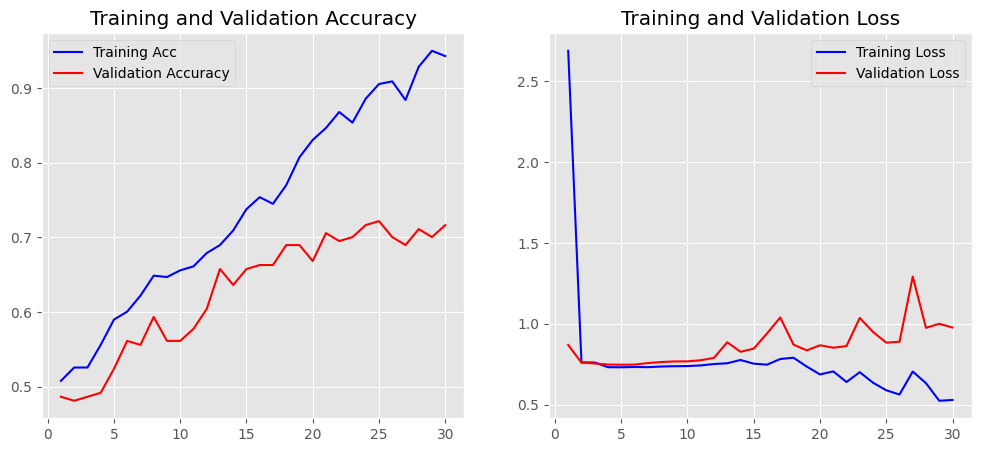

In [34]:
plot_history(history)

You can see that we have trained our model for too long since the training set reached 100% accuracy. A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the model. You can see this around 20-40 epochs in this training.

## TEXT VECTORIZATION USING KERAS

CountVectorizer from sklearn and TextVectorization from tf.keras.layers serve similar purposes: they convert raw text into numeric form that machine learning models can understand.

But they are used in different ecosystems and have some key differences.

.

In [35]:

#(earlier it was used using scikit-learn)
#the preprocessing.text was depricated, the one which was given in tutorial, so i had skipped this section,however next day I used tf and 
# keras documentation and some articles to find my way 

#https://community.deeplearning.ai/t/recommended-way-to-tokenize-new-code/517807
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization
#https://medium.com/@hsinhungw/understanding-word-embeddings-with-keras-dfafde0d15a4#:~:text=The%20Embedding%20Layer%20in%20Keras%20is%20designed%20to%20map%20positive,Layer%20to%20preprocess%20the%20text.


#max_tokens=max vocab size
max_len =50

vectorize_layer = tf.keras.layers.TextVectorization (  #Creates a text preprocessing layer
    max_tokens = 5000,
    standardize = 'lower_and_strip_punctuation',
    output_sequence_length = max_len #Sets a fixed sequence length for each text sample (sentence). 
                                    #All output sequences will be of length 50 — padded or truncated as needed.
)

vectorize_layer.adapt(sentences) #Builds the vocabulary based on the sentences (usually a training dataset)

vectorize_layer.get_vocabulary() #Returns the vocabulary (a list of words), where: Index 0 = "[PAD]" (padding token)
                                  #Index 1+ = words based on frequency

# Now, the layer can map strings to integers -- you can use an embedding layer to map these integers to learned embeddings.

#sentences_to_tokens = vectorize_layer()
X_train=vectorize_layer(sentence_train)  #raw sentence_training data converted into interget sequences called X_train
X_test=vectorize_layer(sentence_test)

#Why Use This?
#Prepares raw text for use in deep learning models (like LSTM, CNN, Transformers).
#Efficient and easy to plug into a TensorFlow pipeline (Sequential, Functional, etc.)




In [36]:
sentences_train.shape,y_train.shape,sentences_train.shape,sentence_train[4],X_train[4]

((750,),
 (561,),
 (750,),
 'Not frightening in the least, and barely comprehensible.  ',
 <tf.Tensor: shape=(50,), dtype=int64, numpy=
 array([  27,  650,   11,    2,  212,    4,  504, 2817,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0])>)

updated: 08-07-25

**Though the above code where maxlen is defined do it by default but we can also do pad_sequence if required in some senarios**

It is used when we have each text sequence with different length of words, which usually happens. 
To counter this, you can use pad_sequence() which simply pads the sequence of words with zeros.  

Additionally you would want to add a maxlen parameter to specify how long the sequences should be. This cuts sequences that exceed that number. 

https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences




In [37]:
#code for padding sequences to make them of the same size, so that they can be used in the model

"""
from keras.utils import pad_sequences
#https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

X_train = pad_sequences(X_train, padding='post', maxlen=max_len) #padding make the arrays of the same size by padding them with the value (here 0)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)
X_train.shape,y_train.shape,sentence_train[4],X_train[4]
"""

"\nfrom keras.utils import pad_sequences\n#https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences\n\nX_train = pad_sequences(X_train, padding='post', maxlen=max_len) #padding make the arrays of the same size by padding them with the value (here 0)\nX_test = pad_sequences(X_test, padding='post', maxlen=max_len)\nX_train.shape,y_train.shape,sentence_train[4],X_train[4]\n"

# Keras Embedding Layer
https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce


Embedding layer is one of the available layers in Keras. This is mainly used in Natural Language Processing related applications such as language modeling, but it can also be used with other tasks that involve neural networks. 

While dealing with NLP problems, we can use pre-trained word embeddings such as GloVe. Alternatively we can also train our own embeddings using Keras embedding layer.


Notice that, at this point, our data is still hardcoded. We have not told Keras to learn a new embedding space through successive tasks.
Now you can use the Embedding Layer of Keras which takes the previously calculated integers and maps them to a dense vector of the embedding. 

There are three parameters to the embedding layer

- input_dim : Size of the vocabulary
- output_dim : Length of the vector for each word
- input_length : Maximum length of a sequence


With the Embedding layer we have now a couple of options. One way would be to take the output of the embedding layer and plug it into a Dense layer. In order to do this you have to add a Flatten layer in between that prepares the sequential input for the Dense layer:

In [38]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50
maxlen =100
vocab_size=vectorize_layer.vocabulary_size()
model = Sequential()

model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim)) #The output of the embedding layer is a 2D vector where 
                                                      #every vector represents a single word from the vocabulary. 
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4740 - loss: 0.6955 - val_accuracy: 0.4866 - val_loss: 0.6982
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5395 - loss: 0.6801 - val_accuracy: 0.5455 - val_loss: 0.6902
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7480 - loss: 0.6203 - val_accuracy: 0.4866 - val_loss: 0.7037
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.3973 - val_accuracy: 0.6631 - val_loss: 0.6444
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.1444 - val_accuracy: 0.6578 - val_loss: 0.6620
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9920 - loss: 0.0705 - val_accuracy: 0.6417 - val_loss: 0.6353
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9977 - loss: 0.0326 - val_accuracy: 0.6684 - val_loss: 0.6562
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 0.6578 - val_loss:

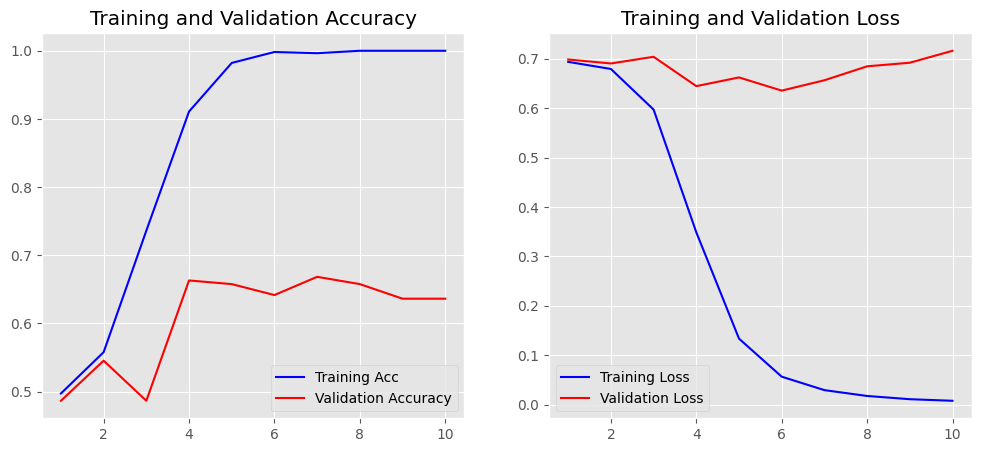

In [39]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)



loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

This is typically a not very reliable way to work with sequential data as you can see in the performance. When working with sequential data you want to focus on methods that look at local and sequential information instead of absolute positional information.

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. You can think of the pooling layers as a way to downsample (a way to reduce the size of) the incoming feature vectors.

**Pooling** is an operation layer offered by Keras to be implemented by adding to CNN between layers. The main purpose of pooling is to reduce the size of feature maps, which in turn makes computation faster because the number of training parameters is reduced. The pooling operation summarizes the features present in a region, the size of which is determined by the pooling filter


In the case of max pooling you take the maximum value of all features in the pool for each feature dimension. In the case of average pooling you take the average, but max pooling seems to be more commonly used as it highlights large values.

Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer

.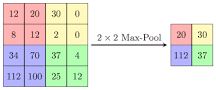!


Global max/average pooling takes the maximum/average of all features whereas in the other case you have to define the pool size

In [40]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim))
model.add(layers.GlobalMaxPool1D()) #this layer is added now
model.add(layers.Dense(10, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.summary()

In [41]:
clear_session(free_memory=True)
history= model.fit(X_train,y_train, epochs=12,verbose=True, validation_data=(X_test,y_test),batch_size=5,)

Epoch 1/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4422 - loss: 0.8323 - val_accuracy: 0.5829 - val_loss: 0.7556
Epoch 2/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6335 - loss: 0.7388 - val_accuracy: 0.6578 - val_loss: 0.7115
Epoch 3/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6688 - loss: 0.6954 - val_accuracy: 0.6898 - val_loss: 0.6894
Epoch 4/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9237 - loss: 0.6542 - val_accuracy: 0.6952 - val_loss: 0.6598
Epoch 5/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9225 - loss: 0.5636 - val_accuracy: 0.7487 - val_loss: 0.6285
Epoch 6/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9603 - loss: 0.4316 - val_accuracy: 0.7701 - val_loss: 0.6092
Epoch 7/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.3014 - val_accuracy: 0.7487 - val_loss: 0.5974
Epoch 8/12
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.2355 - val_accuracy: 0.

In [42]:
loss, accuracy = model.evaluate(X_train,y_train,verbose=False)
print("Training Accuracy: {:.2f} %,Training Loss: {:.2f} %".format(accuracy*100,loss *100) )

loss,accuracy=model.evaluate(X_test,y_test,verbose=False)
print("\nTesting Accuracy: {:.2f} %, Testing Error: {:.2f} %".format(accuracy*100,loss*100))


Training Accuracy: 99.82 %,Training Loss: 11.95 %

Testing Accuracy: 74.33 %, Testing Error: 56.10 %


# Using Pretrained Word Embeddings

This piece of code is responsible for **loading the GloVe pretrained word embeddings** file and **storing the embeddings in a Python dictionary**.

Let’s break it down line by line:

---

### 🔢 ** Code Block**

```python
embeddings_index = {}
with open(os.path.join(glove_dir, glove_file), encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector
```

---

### 🧠 What It Does (Step-by-Step)

| Line                                               | Purpose                                                                                           |
| -------------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| `embeddings_index = {}`                            | Initializes an **empty dictionary** to store word → vector mappings.                              |
| `open(...) as f`                                   | Opens the GloVe text file (like `glove.6B.100d.txt`) for reading.                                 |
| `for line in f:`                                   | Loops through the file **line by line**. Each line contains a word followed by its vector.        |
| `values = line.split()`                            | Splits the line into tokens: the **first token is the word**, the rest are numbers.               |
| `word = values[0]`                                 | Extracts the **word** (e.g., `"apple"`).                                                          |
| `vector = np.asarray(values[1:], dtype="float32")` | Converts the rest of the values (e.g., `100 numbers`) into a NumPy array (i.e., the word vector). |
| `embeddings_index[word] = vector`                  | Stores this word and its vector in the dictionary.                                                |

---

### 🔧 Example Input Line from GloVe File

```
apple 0.09817 0.30344 -0.23418 ... (total 100 numbers)
```

Becomes:

```python
word = "apple"
vector = np.array([0.09817, 0.30344, -0.23418, ..., 0.08716])
embeddings_index["apple"] = vector
```

---

### 📦 Final Output

You get a dictionary like:

```python
embeddings_index = {
    "apple": np.array([...]),
    "banana": np.array([...]),
    "deep": np.array([...]),
    ...
}
```

---

### ✅ Purpose in NLP Pipeline

This dictionary is later used to:

* **Build the embedding matrix** for your model,
* So your neural network can **start with pretrained semantic knowledge** of words.


📂 Where to Download GloVe
Download from https://nlp.stanford.edu/projects/glove/

Example: glove.6B.zip → extract → use glove.6B.100d.txt

In [43]:
import numpy as np


#https://www.kaggle.com/code/thierryneusius/textvectorization-embedding-layer-with-keras

def create_embeding_matrix(glove_file,vocabulary,verbose=False):
    embeddings_index={}
    
    with open (glove_file,encoding="utf8") as f:
        for line in f:
            values=line.split()#split a line in to included words on the basis of given dilemeter/seperator (like " " or ',')
            word=values[0]
            word_vector=np.asarray(values[1:],dtype='float32')# weights of the "word" residing at values[0]
            embeddings_index[word]=word_vector

    any_word=list(embeddings_index.keys())[10] #fetching any of the word from embedding index, to get its dimension
    emb_dim=embeddings_index[any_word].shape[0]
    
    word_index=dict(zip(vocabulary,range(len(vocabulary)))) #creating a dictionary with words as keys and a conteneous 
                                                            #integer value as its serial number:

    
    
    #The zip() function in Python is used to combine two or more iterable dictionaries into a single iterable, where corresponding elements 
    #from the input iterable are paired together as tuples.
        
    if verbose:
        #for key,values in word_index.items():
            #print(f"{key}: {values}")
      
            

        print("Found {} word vectors".format(len(embeddings_index)))
        print("Embedding dimensions: ",emb_dim)

    num_tokens=len(vocabulary)+1
    embedding_matrix=np.zeros(shape=(num_tokens,emb_dim)) #returns n-dimenional array
    
    if verbose:
        print("Embedding Matrix dimmesion:",embedding_matrix.shape)
            

    # In the vocabulary, index 0 is reserved for padding
    # and index 1 is reserved for "out of vocabulary" tokens.
    # The first 2 word in the vocabulary are '', '[UNK]'

    hits=0
    misses=0

    for word, i in word_index.items(): 
        embedding_vector=embeddings_index.get(word) #checking if the word in given vocabulary is present in the glove vocabulary 
        if embedding_vector is not None:
           
            embedding_matrix[i]=embedding_vector #appending our final embedding matrix with the related embedding vector 
                                                # by the Glove. The index of our words is the related enmeddgin vector. this is 
                                                # how Embedding layer maps our vocab words/ training set to the embedding vector
                                                #  
            #print(embedding_vector) # to see how the embedding vector looks like
            
            hits+=1
        else:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV" (Out-Of-Vocabulary)
            misses+=1
            
    if verbose:
           print("Converted {} words ({} misses)".format(hits, misses))
    return embedding_matrix


    
    
        
#tokenization — Splitting text into smaller units such as words or phrases. 
#vectorization — Converting text into numerical representations/ interger sequence for ML models                              
    

In [44]:
import os
os.getcwd()

'i:\\my Documents\\AI\\05 Collaboration Projects -GitHub\\practice_project_files'

In [45]:
#different ways to open a file
#with open ("../practice_project_files/data/sentiment_analysis/glove.6B/glove.6B.50d.txt",encoding="utf8") as f:
#with open ("..\practice_project_files\data\sentiment_analysis\glove.6B\glove.6B.50d.txt",encoding="utf8") as f:
#with open ("\\practice_project_files\\data\\sentiment_analysis\\glove.6B\\glove.6B.50d.txt",encoding="utf8") as f:

    #for line in f:
        #values=line.split()

"""
['[UNK]',
 np.str_('the'),
 np.str_('a'),
 np.str_('and'),
 np.str_('of'),
 np.str_('is'),
 np.str_('this'),
 np.str_('i'),
 np.str_('it')]
"""

vocabulary=vectorize_layer.get_vocabulary()
print("The length of the vocabulary is:",len(vocabulary))
word_index=dict(zip(vocabulary,range(len(vocabulary))))
print("Vocabulary-type:LIST",vectorize_layer.get_vocabulary() [1:10]) #returns NumPy-specific string type (numpy.str_) — 
                                                                       #typically used when you’re working with NumPy arrays 
                                                                       # of strings.



word_index #a dictionary type

The length of the vocabulary is: 3177
Vocabulary-type:LIST ['[UNK]', np.str_('the'), np.str_('a'), np.str_('and'), np.str_('of'), np.str_('is'), np.str_('this'), np.str_('i'), np.str_('it')]


{'': 0,
 '[UNK]': 1,
 np.str_('the'): 2,
 np.str_('a'): 3,
 np.str_('and'): 4,
 np.str_('of'): 5,
 np.str_('is'): 6,
 np.str_('this'): 7,
 np.str_('i'): 8,
 np.str_('it'): 9,
 np.str_('to'): 10,
 np.str_('in'): 11,
 np.str_('was'): 12,
 np.str_('movie'): 13,
 np.str_('that'): 14,
 np.str_('film'): 15,
 np.str_('0'): 16,
 np.str_('1'): 17,
 np.str_('for'): 18,
 np.str_('as'): 19,
 np.str_('but'): 20,
 np.str_('with'): 21,
 np.str_('its'): 22,
 np.str_('one'): 23,
 np.str_('you'): 24,
 np.str_('on'): 25,
 np.str_('are'): 26,
 np.str_('not'): 27,
 np.str_('bad'): 28,
 np.str_('very'): 29,
 np.str_('just'): 30,
 np.str_('so'): 31,
 np.str_('all'): 32,
 np.str_('good'): 33,
 np.str_('at'): 34,
 np.str_('an'): 35,
 np.str_('there'): 36,
 np.str_('be'): 37,
 np.str_('about'): 38,
 np.str_('by'): 39,
 np.str_('have'): 40,
 np.str_('like'): 41,
 np.str_('from'): 42,
 np.str_('if'): 43,
 np.str_('time'): 44,
 np.str_('really'): 45,
 np.str_('his'): 46,
 np.str_('acting'): 47,
 np.str_('out'): 48

# Question 1: Where the mapping of our words in sentences is done with Glove embeddings?

Details: How words in my traning sentences which are sequence of integers , returned from a keras vectorization would learn from the Glove's trained embedding matrix as the embedding matrix is float matrix type which is showing embeddings  and my  vocabulary has sequence of integers?  


Excellent question — this is a key concept in using **pretrained embeddings like GloVe** in Keras.

You're asking:

> If Keras `TextVectorization` returns sequences of **integers** representing **word indices**, and GloVe provides **float vectors** (embeddings) for words — how does the model learn from this?

Let’s break it down step by step:

---

🧠 1. **You Start with Sentences → Integers**

You use a tokenizer or `TextVectorization` layer to convert text to sequences of integers:

```python
texts = ["I love cats", "Cats are cute"]
tokenizer = tf.keras.layers.TextVectorization()
tokenizer.adapt(texts)
sequence = tokenizer(["I love cats"])  # Might return: [[2, 4, 6]]
```

Each integer corresponds to a word in the **vocabulary**.

---

🧠 2. **Map Integers to Vectors using Embedding Layer**

The `Embedding` layer translates those integer indices into their corresponding **vectors** (learned or pretrained):

```python
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],  # Loaded from GloVe
        input_length=max_len,
        trainable=False  # GloVe stays frozen
    ),
    ...
])
```

So if:

* `'I'` → 2
* `'love'` → 4
* `'cats'` → 6

```python
X_train = [[2, 4, 6]]
```

Since, **Each integer in the sequence** refers to a **row index** in the `embedding_matrix`.

Then the embedding layer does this:

```python
[2, 4, 6]  →  [[0.15, -0.32, ...],  # vector for 'I'
               [0.98, 0.12, ...],   # vector for 'love'
               [0.22, -0.85, ...]]  # vector for 'cats'
```

---

🔁 3. **How GloVe Embeddings Are Used**

When you load GloVe vectors and assign them to `embedding_matrix`, you're telling Keras:

##### These **pretrained float vectors** represent my vocabulary words. When you see an integer like 4, use the 4th vector in this matrix**

The `embedding_matrix` is shaped like:

```python
(vocab_size, embedding_dim)
```

Each row matches the **index** assigned to a word by your tokenizer.

---

 ✅ Summary: Bridging Integers with Vectors

| Stage           | What Happens                                  |
| --------------- | --------------------------------------------- |
| Tokenization    | Words → Integers                              |
| Embedding Layer | Integers → GloVe vectors (via matrix lookup)  |
| Model Training  | Uses those vectors as input to learn patterns |



Further details:

1. **Each integer in the sequence** refers to a **row index** in the `embedding_matrix`.

2. The `Embedding` layer looks up those rows:

   ```python
   embedding_output = [
       embedding_matrix[2],
       embedding_matrix[4],
       embedding_matrix[6]
   ]
   ```

3. The output becomes a 2D array (or 3D batch) of float vectors, one for each token in the sequence.

---

 📦 Example in Code (Step by Step)

```python
# Example word index:
word_index = {'i': 2, 'love': 4, 'cats': 6}

# Sample sequence
sequence = [[2, 4, 6]]  # "I love cats"

# Corresponding GloVe embedding matrix (rows = word vectors)
embedding_matrix = np.zeros((vocab_size, embedding_dim))
embedding_matrix[2] = np.array([0.1, 0.2, ...])  # 'i'
embedding_matrix[4] = np.array([0.3, 0.6, ...])  # 'love'
embedding_matrix[6] = np.array([0.5, -0.1, ...]) # 'cats'

# Embedding layer maps integers to vectors
embedding_layer = tf.keras.layers.Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=3,
    trainable=False
)

# Model
model = tf.keras.Sequential([
    embedding_layer
])

# Run data through model
output = model(sequence)
```

---

##### 🔁 Summary

✔ The **mapping happens automatically** inside the `Embedding` layer.
✔ The **input sequence** `[2, 4, 6]` is **not manually mapped** by you.
✔ Keras uses the index values to **lookup rows in `embedding_matrix`**, turning them into float vectors (GloVe embeddings).


In [46]:
embedding_dim=50
embedding_matrix=create_embeding_matrix("../practice_project_files/data/sentiment_analysis/glove.6B/glove.6B.50d.txt",vectorize_layer.get_vocabulary(),verbose=True)

#embedding_matrix[0:10]

Found 400000 word vectors
Embedding dimensions:  50
Embedding Matrix dimmesion: (3178, 50)
Converted 2997 words (180 misses)


 **what each layer does and why it's there**.

---

## 🔢 Code:

```python
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              input_length=max_len,
              weights=[embedding_matrix],
              trainable=False),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
```

---

## 🧠 Layer-by-Layer Explanation

---

### 1. 🔤 `Embedding(...)`

```python
Embedding(input_dim=vocab_size,
          output_dim=embedding_dim,
          input_length=max_len,
          weights=[embedding_matrix],
          trainable=False)
```

| Parameter         | Meaning                                                             |
| ----------------- | ------------------------------------------------------------------- |
| `input_dim`       | Total vocabulary size (how many unique words you support)           |
| `output_dim`      | Dimension of the embedding vectors (e.g., 100 if using GloVe 100d)  |
| `input_length`    | Maximum number of words in a sequence (sentence length)             |
| `weights`         | Pretrained GloVe embeddings as a NumPy matrix                       |
| `trainable=False` | Prevents training of the embeddings — keeps GloVe vectors unchanged |

🔸 **What it does**:
It maps each word (integer) in the input sentence into a **pretrained vector**. The output shape from this layer is:

```python
(batch_size, max_len, embedding_dim)
```


### 🔍 Parameter-by-Parameter Explanation

---

#### a. **`input_dim=vocab_size`**

* 📌 **What it is**:
  The **size of your vocabulary**, i.e., how many **unique words (or tokens)** your tokenizer has indexed.

* 📥 **Why it's needed**:
  This tells the layer how many unique **integers** (word IDs) it should expect as input.

* 🧠 **Example**:

  ```python
  vocab_size = 10_000
  # Your tokenizer saw 10,000 unique words in the training corpus
  ```

---

#### b. **`output_dim=embedding_dim`**

* 📌 **What it is**:
  The **dimension of each word vector** — this determines the number of features per word.

* 🧠 **Common values**:

  * 50, 100, 200, or 300 (based on GloVe)
  * Can be any number if you're learning embeddings from scratch

* 📥 **Why it's needed**:
  This defines the shape of each word's embedding (e.g., 100D vector for each word).

---

#### c. **`input_length=max_len`**

* 📌 **What it is**:
  The **length of each input sequence** (i.e., how many words per input).

* 📥 **Why it's needed**:
  Helps Keras **infer the output shape** of the embedding layer, which is useful for building models.

* 🧠 **Example**:
  If each sentence has 20 words:

  ```python
  input_length = 20
  ```

---

#### d. **`weights=[embedding_matrix]`**

* 📌 **What it is**:
  A list containing the **pretrained embedding matrix** (e.g., from GloVe).

* 🧠 **Shape** of `embedding_matrix`:

  ```python
  (vocab_size, embedding_dim)
  ```

* 📥 **Why it's used**:
  Instead of initializing word embeddings randomly, we initialize them with **pretrained vectors** that already capture semantic meaning.

* ✅ **Effect**:
  This helps the model start with a better understanding of language from the beginning.

---

#### e. **`trainable=False`**

* 📌 **What it is**:
  A Boolean flag indicating whether to **allow updating the embedding weights during training**.

* ✅ **When `False`**:
  Embeddings are **frozen** — the model won’t update them.

* 🔄 **When `True`**:
  Embeddings are **fine-tuned** during training (which can sometimes improve performance on your specific task).

---

#### 🔁 Summary of the Layer Behavior

#### Input:

* A batch of sentences represented as integer sequences (e.g., `[12, 45, 678, 3, 89]`)

#### Output:

* A batch of embedded sequences: 3D tensor of shape:

  ```
  (batch_size, input_length, output_dim)
  ```

---

Let me know if you want a visual diagram or code that constructs the `embedding_matrix` too.


### 2. 🌊 `GlobalAveragePooling1D()`

```python
GlobalAveragePooling1D()
```

🔸 **What it does**:
Takes the average across the time dimension (i.e., the `max_len`) for each feature in the embedding.

📥 Input shape: `(batch_size, max_len, embedding_dim)`
📤 Output shape: `(batch_size, embedding_dim)`

So if you had `(32, 10, 100)` → this becomes `(32, 100)`.

It's a way to **summarize a whole sentence** into a single vector by averaging word embeddings.

---

### 3. 🧠 `Dense(16, activation='relu')`

```python
Dense(16, activation='relu')
```

🔸 **What it does**:
A fully connected (dense) layer with:

* 16 neurons
* ReLU activation

This introduces **non-linearity** and helps learn **higher-level features** from the pooled word embedding.

---

### 4. 🎯 `Dense(1, activation='sigmoid')`

```python
Dense(1, activation='sigmoid')
```

🔸 **What it does**:

* Output layer
* 1 neuron
* Sigmoid activation (outputs value between 0 and 1)

💡 **Used for binary classification** problems (e.g., positive vs. negative sentiment).

---

## 🧱 Summary of Architecture

| Layer                    | Output Shape         | Purpose                            |
| ------------------------ | -------------------- | ---------------------------------- |
| `Embedding`              | (batch, max\_len, d) | Maps words to GloVe vectors        |
| `GlobalAveragePooling1D` | (batch, d)           | Averages sentence into one vector  |
| `Dense(16, relu)`        | (batch, 16)          | Learns patterns                    |
| `Dense(1, sigmoid)`      | (batch, 1)           | Outputs probability (binary class) |

---

## ✅ Use Case

This model is suitable for **text classification tasks** like:

* Sentiment analysis (positive/negative)
* Spam detection (spam/ham)
* Binary text labeling




In [47]:
model=Sequential()
model.add(layers.Embedding(vocab_size+1,embedding_dim,weights=[embedding_matrix],input_length=maxlen,trainable=False))
model.add(layers.GlobalAvgPool1D())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()


i:\my Documents\AI\05 Collaboration Projects -GitHub\practice_project_files\penv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       158,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,900 (620.70 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 158,900 (620.70 KB)

In [48]:
X_train[5:6]

<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[   9,   12,   14,  397,  195,   14, 1769,  335,   14, 2294,   12,
         132,   34,    2,  257,    5,   46,  215,   19, 2573,   39,   46,
        2531, 1166,    5,  628, 2205, 3138, 1977,    2, 1076,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])>

Epoch 1/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5329 - loss: 0.6904 - val_accuracy: 0.4866 - val_loss: 0.6909
Epoch 2/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5443 - loss: 0.6837 - val_accuracy: 0.4866 - val_loss: 0.6883
Epoch 3/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 0.6768 - val_accuracy: 0.4920 - val_loss: 0.6864
Epoch 4/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5423 - loss: 0.6756 - val_accuracy: 0.5027 - val_loss: 0.6821
Epoch 5/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5970 - loss: 0.6658 - val_accuracy: 0.5401 - val_loss: 0.6759
Epoch 6/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6778 - loss: 0.6617 - val_accuracy: 0.5989 - val_loss: 0.6703
Epoch 7/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.6487 - val_accuracy: 0.6203 - val_loss: 0.6647
Epoch 8/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7265 - loss: 0.6380 - val_accuracy: 0.6417 - val_loss:

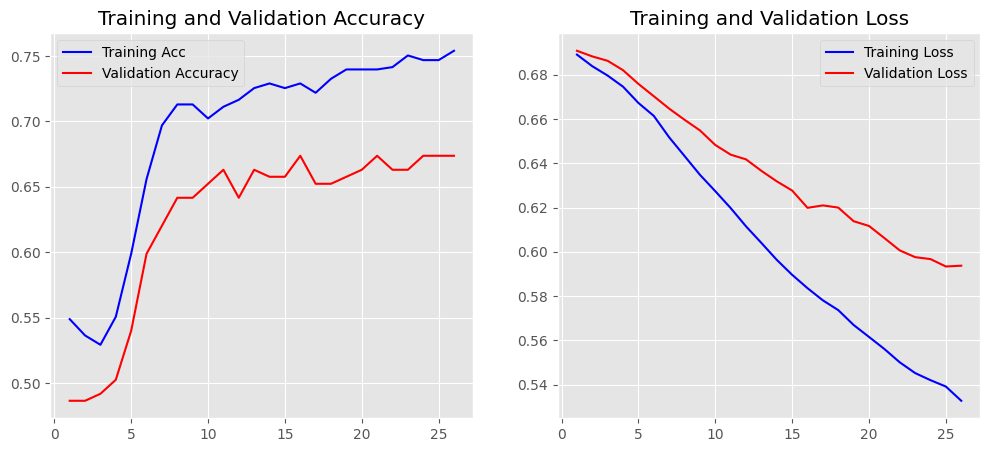

In [49]:
history = model.fit(X_train, y_train,
                    epochs=26,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Now let’s see how this performs if we allow the embedding to be trained by using trainable=True:

What trainable=True Means
It means that the pre-trained embeddings you are using (e.g., GloVe) will be fine-tuned (updated) during training along with the rest of the model's weights.

So:

✅ The model will start with the GloVe vectors (via weights=[embedding_matrix])

✅ But then it will adjust (train) those vectors based on your specific dataset during backpropagation


In [50]:
model=Sequential()
model.add(layers.Embedding(vocab_size+1,embedding_dim,weights=[embedding_matrix],input_length=maxlen,trainable=True))
model.add(layers.GlobalAvgPool1D())
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       158,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,900 (620.70 KB)

 Trainable params: 158,900 (620.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5312 - loss: 0.6903 - val_accuracy: 0.5294 - val_loss: 0.6828
Epoch 2/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5965 - loss: 0.6773 - val_accuracy: 0.4866 - val_loss: 0.6795
Epoch 3/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5916 - loss: 0.6652 - val_accuracy: 0.6738 - val_loss: 0.6651
Epoch 4/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6381 - loss: 0.6537 - val_accuracy: 0.6898 - val_loss: 0.6536
Epoch 5/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7587 - loss: 0.6282 - val_accuracy: 0.5668 - val_loss: 0.6539
Epoch 6/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6973 - loss: 0.6149 - val_accuracy: 0.6631 - val_loss: 0.6265
Epoch 7/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8291 - loss: 0.5728 - val_accuracy: 0.7166 - val_loss: 0.6122
Epoch 8/26
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8163 - loss: 0.5381 - val_accuracy: 0.7219 - val_loss:

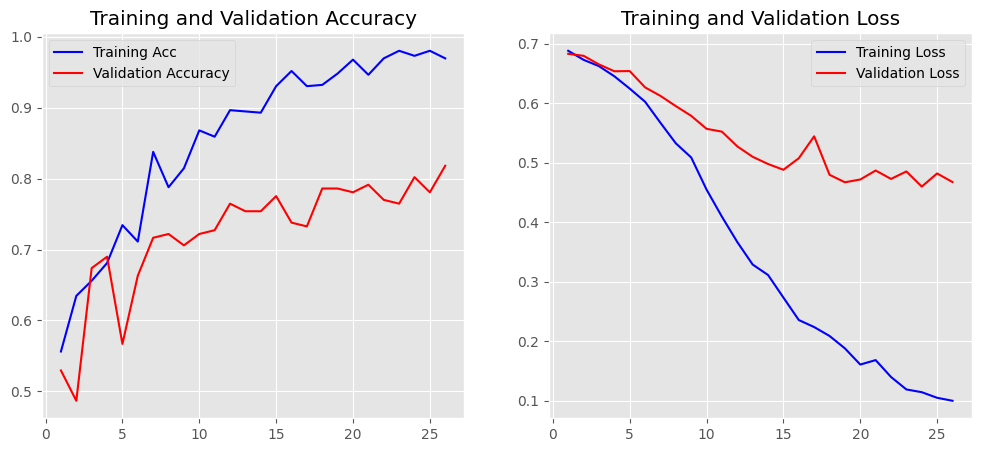

In [51]:
history = model.fit(X_train, y_train,
                    epochs=26,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Now it is time to focus on a more advanced neural network model to see if it is possible to boost the model and give it the leading edge over the previous models.

# Adding Convolutional Neural Networks Layer in the model 


https://medium.com/@learnwithwhiteboard_digest/difference-between-ann-vs-cnn-vs-rnn-ae40269b46e7#:~:text=The%20key%20difference%20between%20a,using%20a%20set%20of%20weights.


Convolution is a mathematical operation that allows the merging of two sets of information. In the case of CNN, convolution is applied to the input data to filter the information and produce a feature map.

The key difference between a CNN and other types of neural networks is that it uses a process called “convolution” to extract features from the input data.

In a convolutional layer, the input data is divided into small “kernels,” or squares, which are then processed using a set of weights. These weights are adjusted during the training process to identify patterns and features in the input data. The output of the convolutional layer is a set of “feature maps,” which represent the presence of different features in the input data

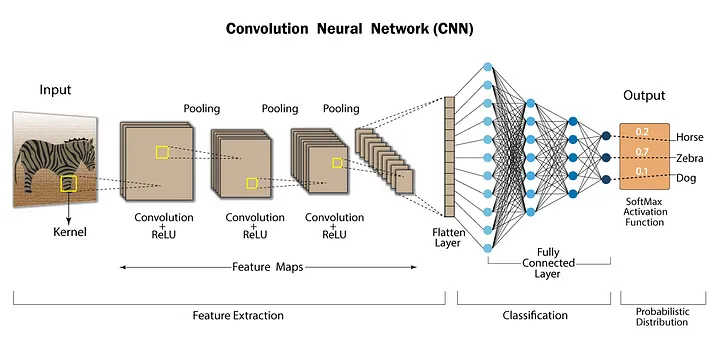






In [52]:
from keras.backend import clear_session
clear_session()

## Building a `Conv1D` (1D Convolutional) layer 

```python
keras.layers.Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding='valid',
    activation=None,
    input_shape=None
)
```

---

#### 🧱 Parameters Explained

| Parameter     | Description                                                                          |
| ------------- | ------------------------------------------------------------------------------------ |
| `filters`     | Number of output filters (i.e., feature detectors).                   
| `kernel_size` | Size of the convolutional window (e.g., 3, 5).                                       |
| `strides`     | How far the filter moves at each step. Default is 1.                                 |
| `padding`     | `'valid'` (no padding) or `'same'` (zero-padding to preserve input size).            |
| `activation`  | Activation function (e.g., `'relu'`, `'sigmoid'`).                                   |
| `input_shape` | Only needed for the first layer (shape of input: `(sequence_length, num_features)`). |

---

What Is a Filter in Conv1D?
A filter is a 1D sliding window (or kernel) that moves across the input sequence.

Each filter detects a different pattern in the input (e.g., a sequence of increasing values, specific word combinations, etc.).

So, filters=32 means the layer will learn 32 different filters, each generating its own output feature map.

#### 🧪 Example 1: Conv1D for Text (Word Embeddings)

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])
```

##### 🧠 What's happening?

* **Embedding Layer**: Turns integer-encoded words into dense 128-dimensional vectors.
* **Conv1D**: Scans 5-word windows across the sequence to detect patterns (n-grams).
* **GlobalMaxPooling1D**: Takes the strongest signal (most activated filter).
* **Dense Layer**: Outputs binary prediction.

---

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu')) #this is CNN layer
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.6316e-04
Training Accuracy: 1.0000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7855 - loss: 0.7217 
Testing Accuracy:  0.7861


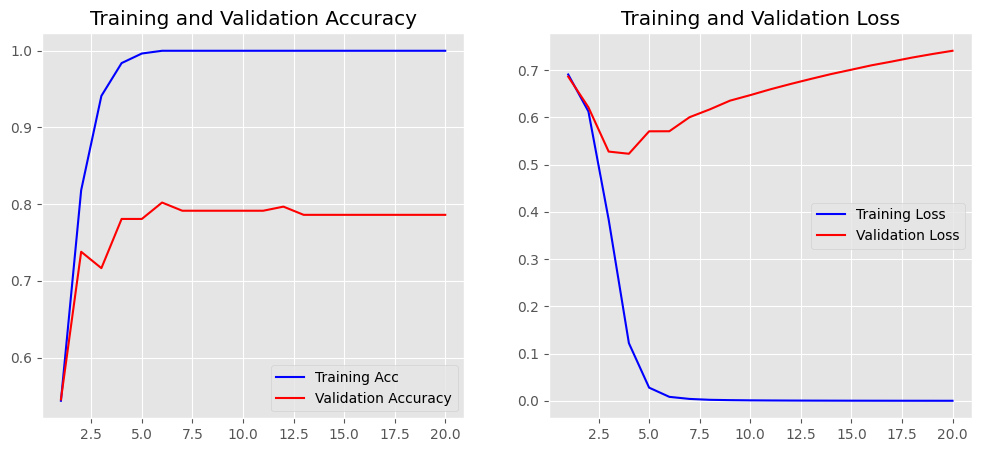

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

You can see that 80% accuracy seems to be tough hurdle to overcome with this data set and a CNN might not be well equipped. The reason for such a plateau might be that:

- There are not enough training samples
- The data you have does not generalize well
- Missing focus on tweaking the hyperparameters

CNNs work best with large training sets where they are able to find generalizations where a simple model like logistic regression won’t be able.

# Hyperparameters Optimization

When you have a look at the competitions on Kaggle, one of the largest places to compete against other fellow data scientists, you can see that many of the winning teams and models have gone through a lot of tweaking and experimenting until they reached their prime. So don’t get discouraged when it gets tough and you reach a plateau, but rather think about the ways you could optimize the model or the data.

One popular method for hyperparameter optimization is grid search. What this method does is it takes lists of parameters and it runs the model with each parameter combination that it can find. It is the most thorough way but also the most computationally heavy way to do this. Another common way, random search, which you’ll see in action here, simply takes random combinations of parameters.

#### KerasClassifier ####


`KerasClassifier` is a **wrapper** that allows you to use a **Keras deep learning model** like a **Scikit-learn estimator** — enabling you to easily integrate Keras models into tools like:

* `GridSearchCV`
* `cross_val_score`
* `Pipeline`
  ...which are part of `scikit-learn`.

---
Scikit-learn expects models to implement a specific interface (`fit`, `predict`, etc.). Keras models don't follow this out-of-the-box — that's where `KerasClassifier` comes in.

It adapts your Keras model to behave like a scikit-learn estimator.

---

In modern Keras versions (especially with TensorFlow 2.x), it comes from:

```python
from scikeras.wrappers import KerasClassifier  # ✅ Recommended
```

> ⚠️ **`tf.keras.wrappers.scikit_learn.KerasClassifier` is now deprecated**. You should use **`scikeras.wrappers.KerasClassifier`** from the `scikeras` package.

---

#### 🛠️ How to Use `KerasClassifier`

Here's a full example:

```python
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define a model-building function
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(100,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Wrap it using KerasClassifier
clf = KerasClassifier(model=build_model, epochs=10, batch_size=32)

# Step 3: Use it in scikit-learn tools
# For example: grid search
param_grid = {
    "batch_size": [16, 32],
    "epochs": [5, 10]
}
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)
```



In [58]:
def create_model(vocab_size, embedding_dim, maxlen,neurons_units=32,model_activation="relu",num_filters=32, kernel_size=3):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation=model_activation))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(neurons_units, activation=model_activation))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
    

Next, you want to define the parameter grid that you want to use in training. This consists of a dictionary with each parameters named as in the previous function. The number of spaces on the grid is 3 * 3 * 1 * 1 * 1, where each of those numbers is the number of different choices for a given parameter.

In [59]:
#pip install scikeras (ran in the terminal)
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
#from keras.layers.wrappers.scikit_learn import KerasClassifier - this is depricated

keras_clf=KerasClassifier(model=create_model,verbose=False)

param_dist = {
    "model__neurons_units": [16, 32, 64],
    "model__model_activation": ['relu', 'tanh'],
    "model__num_filters": [32, 64, 128],
    "model__kernel_size": [3, 5, 7],
    "model__optimizer": ['adam', 'rmsprop'],
    "model__vocab_size": [vocab_size],  # This should match the vocabulary size from your vectorization layer
    "model__embedding_dim": [embedding_dim],  # This should match the embedding dimension you used
    "model__maxlen": [maxlen],  # This should match the maximum sequence length you used
    "batch_size": [16, 32, 64],
    "epochs": [10,15, 20]
}

#Here, model__neurons means: "Pass the neurons parameter to the build_model(neurons=...) function."

#To tell RandomizedSearchCV that a hyperparameter (like neurons) should be passed into build_model(), you need to prefix it with model__. 
# This is how scikeras distinguishes between:
#       Parameters meant for the model-building function
#       Parameters meant for the training process (like epochs, batch_size)

#Example: model.add(Dense(neurons, activation='relu', input_shape=(input_dim,)))
#Herr, "neurons" is a parameter to your custom function, not a built-in Keras argument.
#It’s up to you what you call it (neurons, num_units, etc.) — as long as your build_model() function expects that name.
#So when using RandomizedSearchCV with KerasClassifier, you’re tuning arguments of the build_model() function, not Keras classes directly.


#### Main settings
#vocab_size+1,
# embedding_dim
#weights=[embedding_matrix]
# input_length=maxlen,
# trainable=False


#vocab_size=
#embedding_dim = 50
#maxlen = 100
output_file = '../practice_project_files/data/output.txt'

clf_rcv=RandomizedSearchCV(estimator=keras_clf,
                          param_distributions=param_dist,n_iter=5,cv=3,verbose=1,n_jobs=-1,
                          scoring='accuracy',random_state=42)  

clf_rcv.fit(X_train, y_train)





i:\my Documents\AI\05 Collaboration Projects -GitHub\practice_project_files\penv\lib\site-packages\joblib\externals\loky\backend\resource_tracker.py:120: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some folders/sempahores might leak.
  warnings.warn(


Fitting 3 folds for each of 5 candidates, totalling 15 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

#### from previous working


#Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentence'].values
    y = df['label'].values

    # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train) #It converts each sentence (text) in the texts list into a sequence of integers, #where each integer represents a word based on the word index learned by the Tokenizer.


    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)

    # Save and evaluate results
    prompt = input(f'finished {source}; write to file and proceed? [y/n]')
    if prompt.lower() not in {'y', 'true', 'yes'}:
        break
    with open(output_file, 'a') as f:
        s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
        print(output_string)
        f.write(output_string)